In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D, Dropout, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import os
import PIL
import time
from IPython import display

In [2]:
root_path = r"\images"
root_path = pathlib.Path(root_path)

In [3]:
# prepraing data
batch_size = 32

data = keras.utils.image_dataset_from_directory(
    directory=root_path,
    label_mode=None,
    batch_size=batch_size,
    image_size=(64,64))

Found 63565 files.


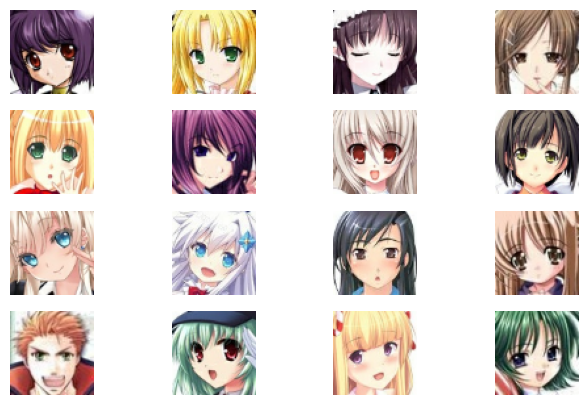

In [4]:
# let's see some images of the dataset
plt.figure(figsize=(8,5))
for images in data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [5]:
# normalizing the input image to the range [-1, 1]
data = data.map(lambda d : ((d-127.5)/127.5))
data

<_MapDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

def Discriminator():
    discriminator = Sequential()
    discriminator.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding="same", input_shape=(64, 64, 3)))
    discriminator.add(LeakyReLU(alpha=0.2))  # Instantiate LeakyReLU layer
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding="same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(filters=256, kernel_size=3, strides=(2, 2), padding="same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.2))

    discriminator.add(Flatten())
    discriminator.add(Dropout(0.2))
    discriminator.add(Dense(units=1, activation="sigmoid"))

    return discriminator

# Create the model and display the summary
D_model = Discriminator()
D_model.summary()

# Optimizer
D_optm = Adam(1e-4)


C:\Users\mogeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mogeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,993 (1.48 MB)

 Trainable params: 388,097 (1.48 MB)

 Non-trainable params: 896 (3.50 KB)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2DTranspose, ReLU
from tensorflow.keras.optimizers import Adam

latent_dim = 100

# Build the Generator function
def Generator():
    generator = Sequential()
    generator.add(Dense(units=4*4*256, input_shape=[latent_dim], use_bias=False))
    generator.add(Reshape((4, 4, 256)))
    generator.add(BatchNormalization())

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(ReLU())  # Explicit ReLU layer
    generator.add(BatchNormalization())

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(ReLU())
    generator.add(BatchNormalization())

    generator.add(Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
    generator.add(ReLU())
    generator.add(BatchNormalization())

    generator.add(Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="tanh"))

    return generator

# Create and summarize the generator
G_model = Generator()
G_model.summary()

# Optimizer
G_optm = Adam(1e-4)


C:\Users\mogeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4096)           │       409,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │         3,459 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,005,827 (3.84 MB)

 Trainable params: 1,004,547 (3.83 MB)

 Non-trainable params: 1,280 (5.00 KB)

tf.Tensor([[0.50015104]], shape=(1, 1), dtype=float32)


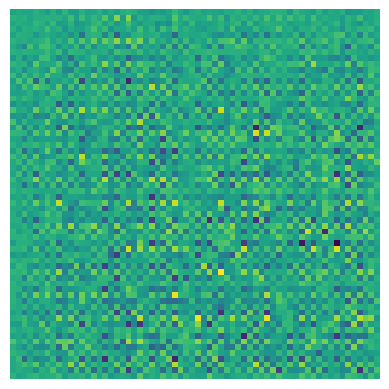

In [9]:
# creating random noise
random_noise = tf.random.normal([1,latent_dim])

# feeding random noise to Genereator
G_output_on_random_noise = G_model(random_noise, training=False)

# showing the image output of G_model
plt.imshow(G_output_on_random_noise[0, :, :, 0])
plt.axis("off")

# feeding the output of Generator to Discriminator
D_output_on_random_noise = D_model(G_output_on_random_noise)
print(D_output_on_random_noise)

In [10]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        
        # Define loss and metrics here
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")
        
    def call(self, inputs):
        noise = inputs
        generated_image = self.generator(noise)
        return self.discriminator(generated_image)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        # Training step implementation
        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal([batch_size, self.latent_dim])
        
        with tf.GradientTape() as tape:
            generated_images = self.generator(noise)
            real_output = self.discriminator(real_images)
            fake_output = self.discriminator(generated_images)
            
            d_loss = self.loss_fn(tf.ones_like(real_output), real_output) + self.loss_fn(tf.zeros_like(fake_output), fake_output)
            
        d_gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables))
        
        with tf.GradientTape() as tape:
            generated_images = self.generator(noise)
            fake_output = self.discriminator(generated_images)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
            
        g_gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_variables))
        
        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result()
        }


In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import os

# Loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# Define GAN model
model = GAN(discriminator=D_model, generator=G_model, latent_dim=latent_dim)

# Build the models by calling them with dummy inputs (ensure the input shape matches your data)
dummy_latent_input = tf.random.normal([1, latent_dim])  # For generator
dummy_real_input = tf.random.normal([1, 64, 64, 3])  

# Build the model by calling it with the correct input shape
model.build(input_shape=(None, 64, 64, 3))  

# Compile GAN model
model.compile(d_optimizer=D_optm, g_optimizer=G_optm, loss_fn=loss_fn)

# Checkpoint directory and file path
checkpoint_dir = r"C:\Users\mogeb\Downloads\archive"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "gan_model_epoch-{epoch:02d}.weights.h5")

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)

# Log training history to a CSV file
csv_logger = CSVLogger(
    filename=os.path.join(checkpoint_dir, "training_log.csv"),
    append=True
)

# Number of epochs
epochs = 20

# Fit the GAN model with checkpointing
history = model.fit(
    data,  
    epochs=epochs,
    callbacks=[checkpoint_callback, csv_logger]
)

# Print a message after training
print("Training complete. Checkpoints saved at:", checkpoint_dir)

# Load the latest checkpoint if available
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    print(f"Resumed training from checkpoint: {latest_checkpoint}")
else:
    print("No checkpoint found. Starting training from scratch.")


Epoch 1/20


1987/1987 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - d_loss: 0.1390 - g_loss: 6.3557
Epoch 1: saving model to C:\Users\mogeb\Downloads\archive\gan_model_epoch-01.weights.h5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 442s 221ms/step - d_loss: 0.1390 - g_loss: 6.3556
Epoch 2/20
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - d_loss: 0.3081 - g_loss: 3.3467
Epoch 2: saving model to C:\Users\mogeb\Downloads\archive\gan_model_epoch-02.weights.h5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 391s 197ms/step - d_loss: 0.3081 - g_loss: 3.3466
Epoch 3/20
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - d_loss: 0.3987 - g_loss: 3.0182
Epoch 3: saving model to C:\Users\mogeb\Downloads\archive\gan_model_epoch-03.weights.h5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 396s 199ms/step - d_loss: 0.3987 - g_loss: 3.0182
Epoch 4/20
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - d_loss: 0.4030 - g_loss: 3.0302
Epoch 4: saving model to C:\Users\mogeb\Downloads\archive\gan_model_epoch-04.weights.h5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 373s 188ms/step - d_loss:

### **Results**

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import os
# Loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# Define GAN model
model = GAN(discriminator=D_model, generator=G_model, latent_dim=latent_dim)

# Build the models by calling them with dummy inputs (ensure the input shape matches your data)
dummy_latent_input = tf.random.normal([1, latent_dim]) 
dummy_real_input = tf.random.normal([1, 64, 64, 3])  

# Build the model by calling it with the correct input shape
model.build(input_shape=(None, 64, 64, 3)) 

# Compile GAN model
model.compile(d_optimizer=D_optm, g_optimizer=G_optm, loss_fn=loss_fn)

# Checkpoint directory and file path
checkpoint_dir = r"archive"
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "gan_model_epoch-{epoch:02d}.weights.h5")

# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)

# Log training history to a CSV file
csv_logger = CSVLogger(
    filename=os.path.join(checkpoint_dir, "training_log.csv"),
    append=True
)


# Load the latest checkpoint if available
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    print(f"Resumed training from checkpoint: {latest_checkpoint}")
else:
    print("No checkpoint found. Starting training from scratch.")

new_epochs = 150  

# Fit the GAN model with checkpointing for additional epochs
history = model.fit(
    data, 
    epochs=new_epochs,
    initial_epoch=150,  
    callbacks=[checkpoint_callback, csv_logger]  
)

# Print a message after training
print("Training complete. Checkpoints saved at:", checkpoint_dir)


No checkpoint found. Starting training from scratch.
Training complete. Checkpoints saved at: C:\Users\mogeb\Downloads\archive


C:\Users\mogeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\mogeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


gan_model_epoch-01


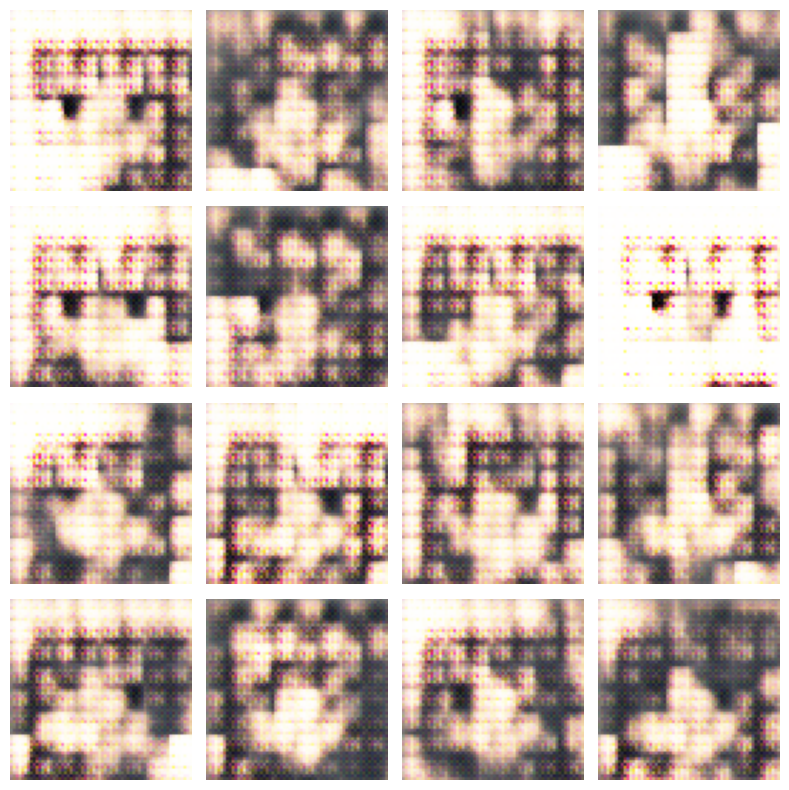

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\gan_model_epoch-01.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])  

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-01")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-20


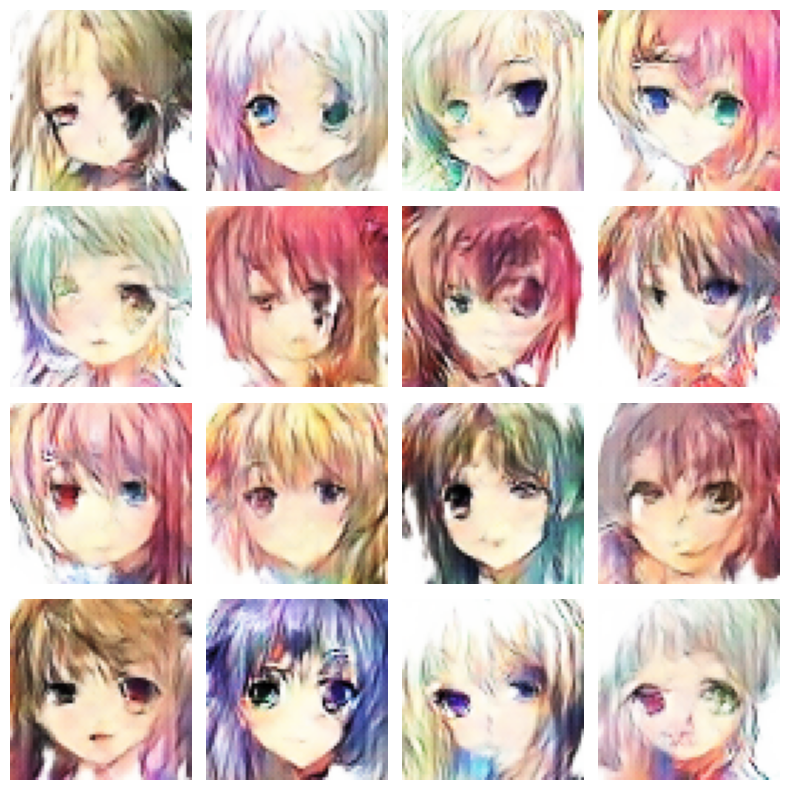

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\gan_model_epoch-20.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])  

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-20")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-50


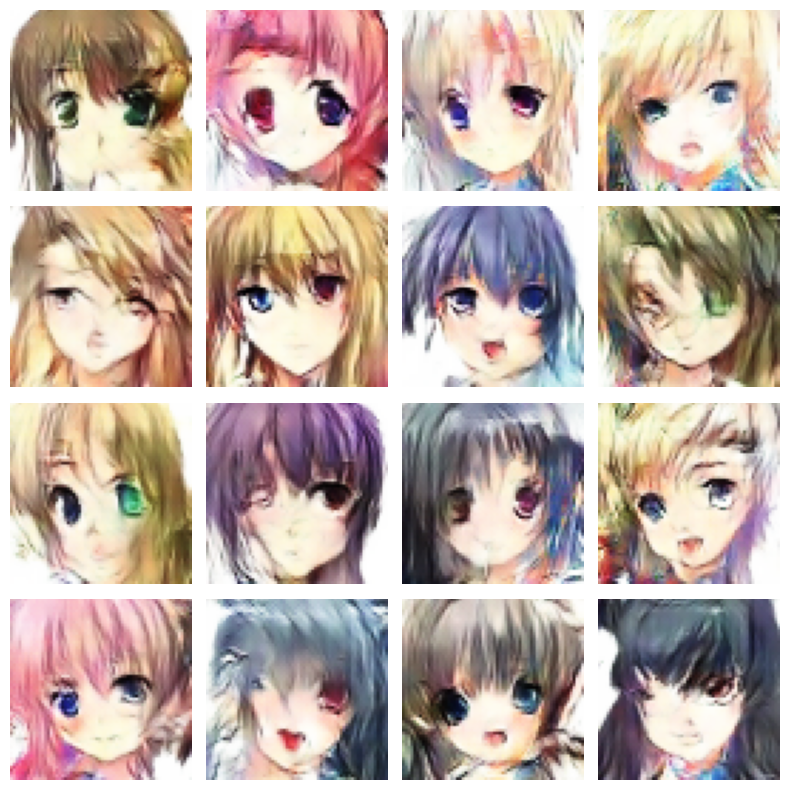

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\comp\gan_model_epoch-50.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])  

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-50")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-80


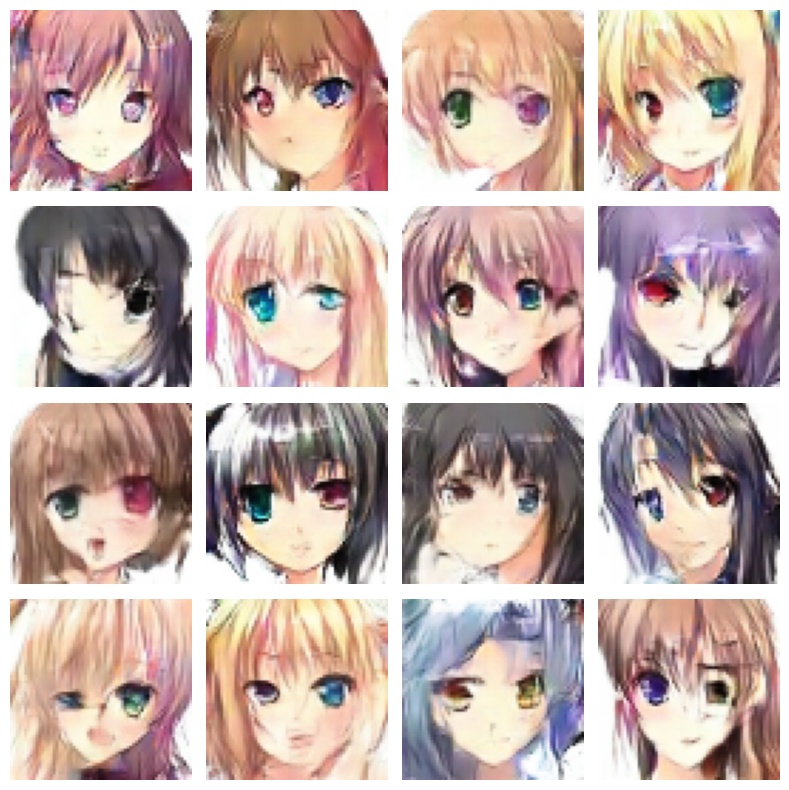

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\comp\gan_model_epoch-80.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100]) 

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-80")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-100


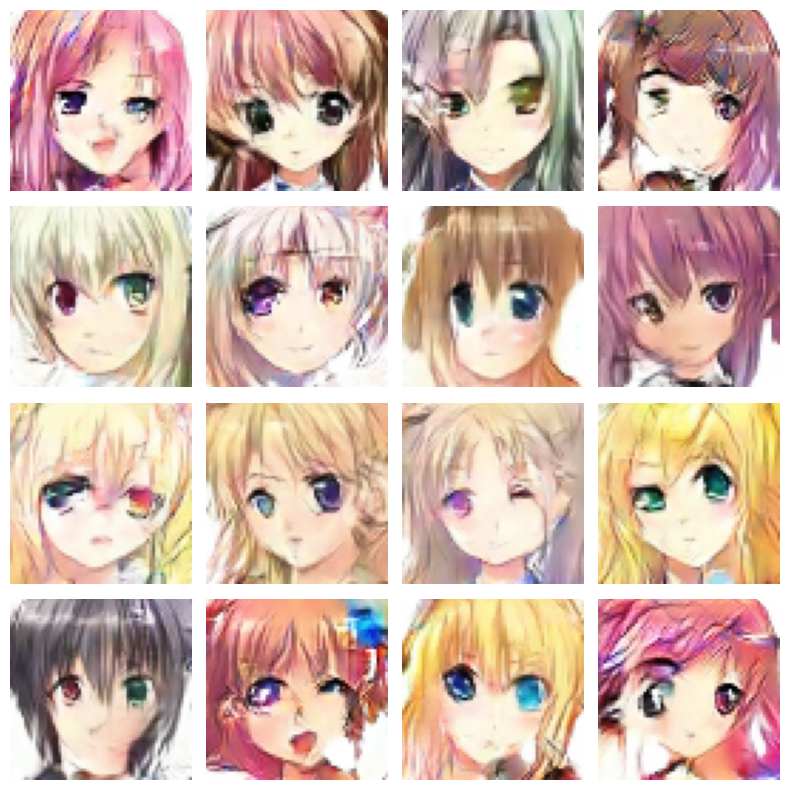

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\comp\gan_model_epoch-100.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])  

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-100")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-130


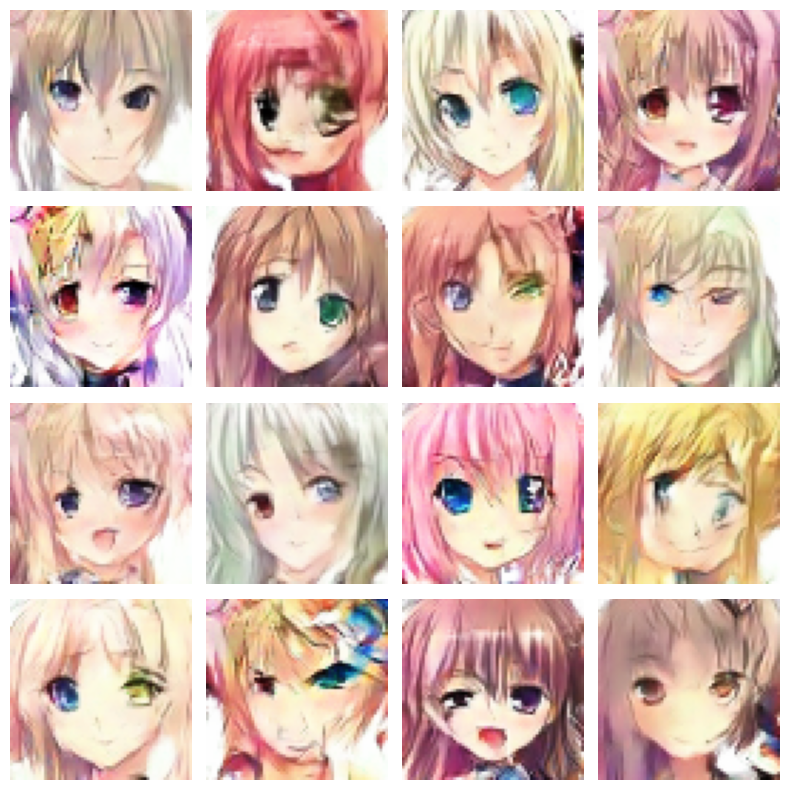

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\comp\gan_model_epoch-130.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-130")
# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


gan_model_epoch-150


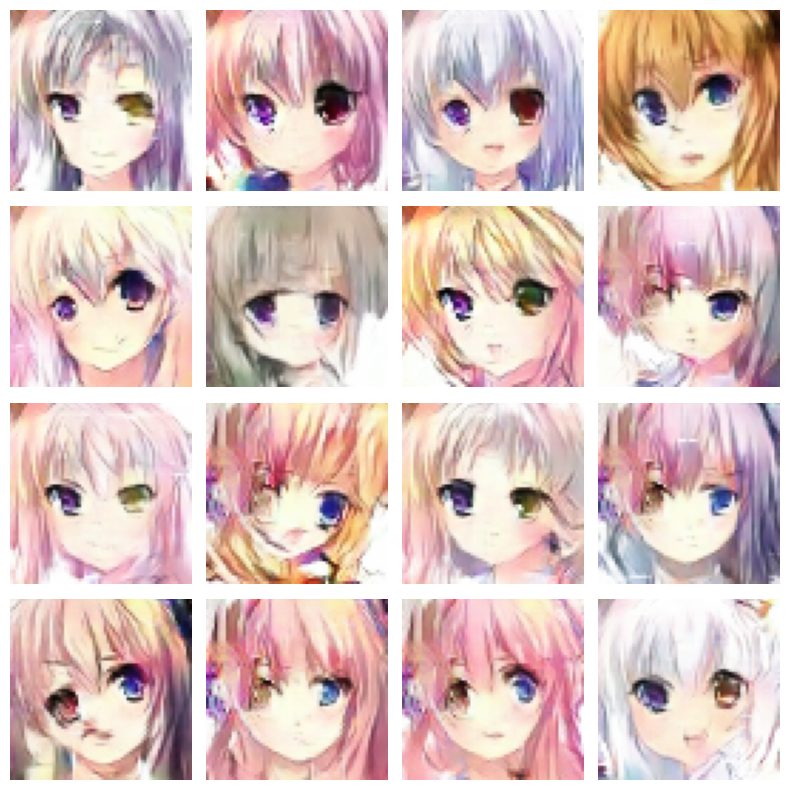

In [ ]:
# Load the weights into the generator and discriminator
checkpoint_path = r"archive\gan_model_epoch-150.weights.h5"
model.load_weights(checkpoint_path)

# Generate random noise
noise = tf.random.normal([32, 100])  

# Generate images using the trained Generator model
generated_images = G_model(noise, training=False)

# Convert the generated images to the range [0, 255]
generated_images = (generated_images + 1) * 127.5
generated_images = tf.clip_by_value(generated_images, 0, 255).numpy().astype("uint8")

print("gan_model_epoch-150")

# Plot the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()